# Support Vector Machines

Author  : David Darigan

ID      : C00263218

## Process

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Modelling
5. Evaluation
6. Goto 1

## CHANGELOG

The changes are listed in descending order (the most-recent change will be at the bottom)

### Change #1

Use 'spam_1.csv' dataset with Support Vector Machine

<img src='img/describe.png' width='500'/>
<br>
<img src='img/scores.png' width='500'>
<img src='img/confusion.png' width='500'>

Observations

- High accuracy with poor precision (and related) scores indicate data is overfitted
- Confusion Matrixs with no false positives emphasizes this
- Dataset is likely imbalanced
- Negative R2 suggests model is failing

### Change #2

Got counts of ham (not spam) and spam in the dataset

<img src='img/counts.png' width=500>

Observations

With a ratio of almost 6:1, the dataset is clearly poorly suited.

### Change #3

Limited data to 700 ham and 700 spam messages.

<img src='img/minimize.png' width=500>

Observations

This has created a problem with the SVC classifier which is consuming the text directly (whereas it wasn't previous)

### Change #4

Encoded the text to numeric data

<img src='img/scores2.png' width=500>
<img src='img/confusion2.png' width=500>

Observations

- No score is showing 0 so our dataset is balanced
- R2 score is negative. The initial guess is because our sample data is so small.

### Change #5

Duplicated the dataset four times (same data, just repeated)

<img src='img/scores3.png' width=500>

Observations

- No major increase in scores
- R2 score is still low
- Concluding this dataset isn't fit for purpose

### Change #6

Change dataset to 'emails.csv'

<img src='img/scores4.png' width=500>
<img src='img/confusion4.png' width=500>

Obversations

- Accuracy has significantly improved
- R2 score is still negative
- Confusion Matrix has significant number of false negatives

### Change #7

- Modified dataset so it would be 1:1 (1500 values each)
- Reduced test size down to 0.2

<img src='img/scores5.png' width=500>
<img src='img/confusion5.png' width=500>

Obversations

- Mean Squared Error is no longer negative
- A more even distribution in our confusion matrix (probably due to an more even dataset)
- Recall & F1 score are significantly higher

### Change #8

Changed Model to NuSVR

<img src='img/scores6.png' width=500>
<img src='img/confusion6.png' width=500>

Obversations

- Accuracy is very high
- All other scores are very high
- Data might be overfitted
- Confusion Matrix suggests that the data is not overfitted

### Change #9

Finishing touches to Notebook. I am satisfied with these results.

## CODE

### Dependencies

In [15]:
%pip install tabulate
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install tensorflow
%pip install pandas
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


### 1. Business Understanding

Detecting if a message is spam or not spam ('ham')

### 2. Data Understanding

In [2]:
# Data Collection
import pandas as pd

data = pd.read_csv('datasets/emails.csv')

#### Descriptive Statistics

In [93]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


### 3. Data Preparation

##### Transforming Data

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

ham = data[data['Prediction'] == 0].head(1500)
spam = data[data['Prediction'] == 1].head(1500)
data = pd.concat([ham, spam], ignore_index=True)

label_encoder = LabelEncoder()

# Encode the data involved
for col_name in data.columns:
        if data[col_name].dtype == 'object':
            data[col_name] = label_encoder.fit_transform(data[col_name])


##### Data Splitting

In [5]:
# CODE
from sklearn.model_selection import train_test_split

y = data['Prediction']
X = data.drop('Prediction', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


### 4. Modelling

In [6]:
# Select Modeling Technique
from sklearn.svm import SVC, NuSVC, LinearSVC, SVR, NuSVR


# Model Training & Testing
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


/home/alexdarigan/.local/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/alexdarigan/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 5 Evaluation

##### Score Table

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from tabulate import tabulate


# Compute cross-validated scores
accuracy_scores = accuracy_score(y_true=y_test, y_pred=y_pred)
precision_scores = precision_score(y_true=y_test, y_pred=y_pred)
recall_scores = recall_score(y_true=y_test, y_pred=y_pred)
f1_scores = f1_score(y_true=y_test, y_pred=y_pred)
r2_scores = r2_score(y_true=y_test, y_pred=y_pred)
mean_squared_errors = mean_squared_error(y_true=y_test, y_pred=y_pred)

# # Tabulate the scores
headers = ['Metric', 'Score']
scores = [
    ['Accuracy', accuracy_scores],
    ['Precision', precision_scores],
    ['Recall', recall_scores],
    ['F1 Score', f1_scores],
    ['R2 Score', r2_scores],
    ['Mean Squared Error', mean_squared_errors]
]

# # Print the table
print(tabulate(scores, headers=headers))

Metric                 Score
------------------  --------
Accuracy            0.93
Precision           0.954064
Recall              0.90301
F1 Score            0.927835
R2 Score            0.719997
Mean Squared Error  0.07


##### Confusion Matrix

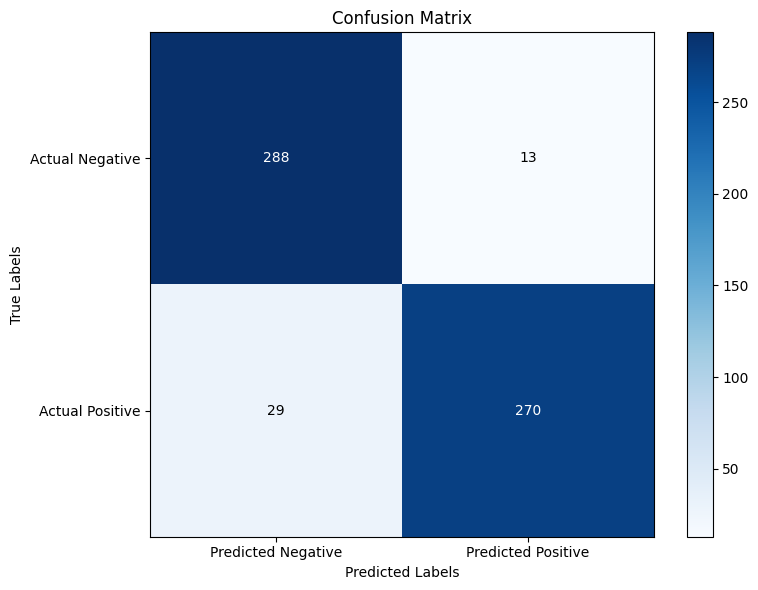

In [142]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()

plt.show()

### Deployment

In [7]:
import joblib

# Pickling The Model
joblib.dump(model, "models/svm.pkl")

['models/svm.pkl']